In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("House_Rent_Dataset.csv")

In [6]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [7]:
df.shape

(4746, 12)

**Observation**
- the dataset has 4746 rows and 12 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**observation**
- there is no null value in the dataset

In [9]:
#accessing the columns of the dataset
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [14]:
#checking the mean of the rents
print("The Mean of the rent is {}".format(df['Rent'].mean()))
print("The Standard deviation of rent is {}".format(df['Rent'].std()))

The Mean of the rent is 34993.45132743363
The Standard deviation of rent is 78106.41293734881


# EDA

<AxesSubplot:xlabel='Rent', ylabel='Count'>

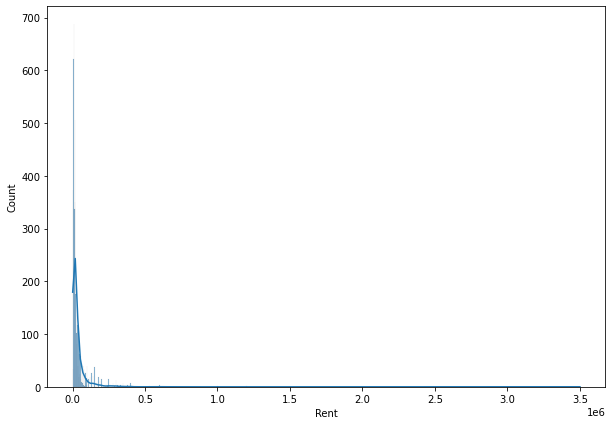

In [23]:
#analyze the  rent
plt.figure(figsize=((10,7)))
sns.histplot(df.Rent,kde=True)

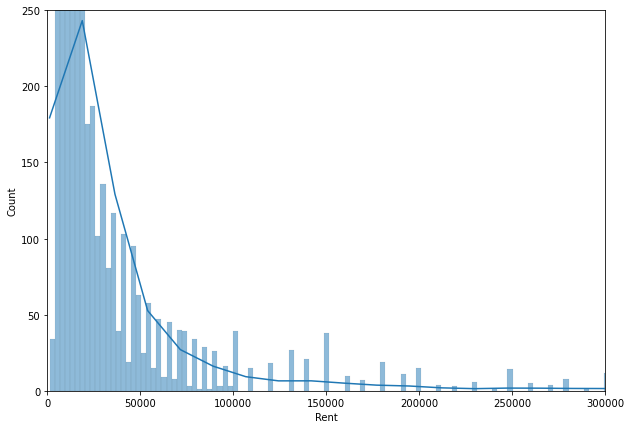

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df.Rent,kde=True)
plt.xlim(0,300000)
plt.ylim(0,250)
plt.show()

C:\Users\Sanwal Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


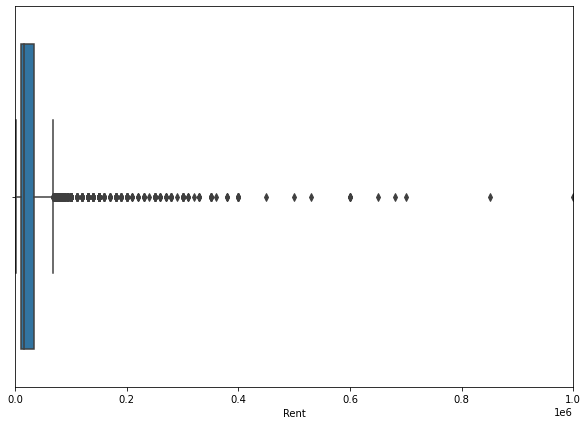

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(df.Rent)
plt.xlim(0,1000000)
plt.show()

In [31]:
#We will apply Log Transformation in order to convert Rent into Normal Distribution
df['Rent']=np.log1p(df['Rent'])

C:\Users\Sanwal Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rent'>

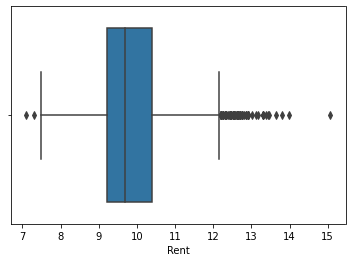

In [33]:
sns.boxplot(df.Rent)

In [35]:
df['Posted On'].nunique()

81

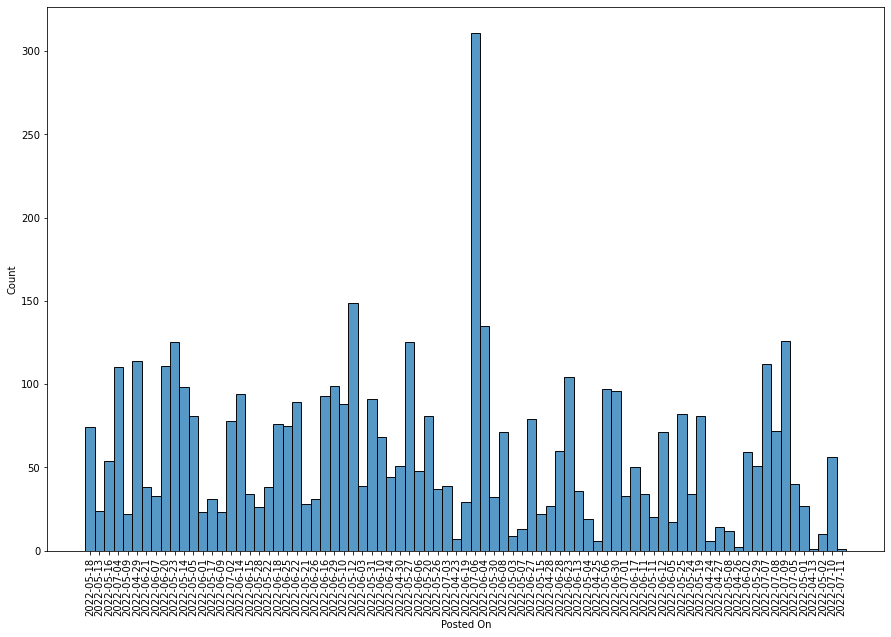

In [36]:

plt.figure(figsize=(15,10))
sns.histplot(df['Posted On'])
plt.xticks(rotation='vertical')
plt.show()


In [37]:
#Analyzing the BHK column
df.BHK.unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

C:\Users\Sanwal Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK', ylabel='count'>

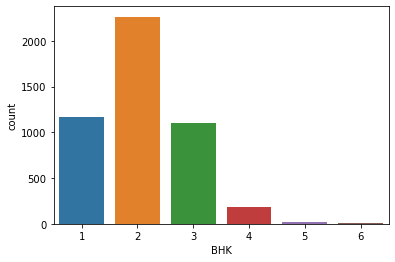

In [39]:
sns.countplot(df.BHK)

**observation**
- the 2 bedroom ratio very high
- the 1 and 3 bedroom are ratio almost same but less than the bed room 3
- bedroom 4,5,6 are minor

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

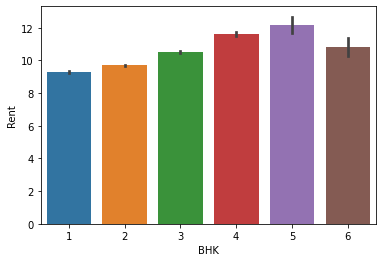

In [45]:
sns.barplot(data=df,x='BHK',y='Rent')

**obervation**
- The Average Rent of the 5BHK is the highest compare to all

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

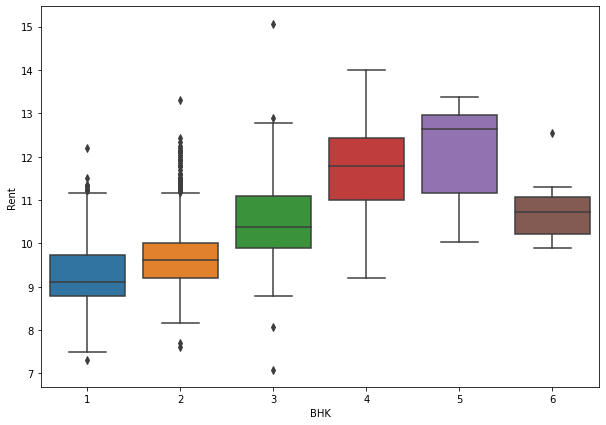

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='BHK',y='Rent')